# Selección de ventana para TAMA
En esta notebook vamos a intentar buscar los mejores parámetros de ventana para el corpus que tenemos.

Hay dos parámetros a buscar
- Longitud de ventana/frame: Es el largo de cada ventana que utilizaremos en la construcción de la serie de tiempo
- Salto entre ventana/frame: Es el salto que vamos a dar entre cada cada punto de la serie de tiempo.

Kousidis utilizó `10''` para el salto, `20''` para el largo de ventana. Esto da un 50% de superposición. Nosotros vamos a buscar parámetros "óptimos" manteniendo este 50% de superposición.

Primero, carguemos las sesiones...

In [1]:
# Run this once!
%matplotlib inline
import os
os.chdir("./..")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import config
from session import load_session
from tama import tama, hybrid_tama
import pandas as pd


sessions = []


for i in range(1, 13):
    if (i!= 1 and i != 11): 
        sessions.append(load_session(i))
    

Vamos a usar el rango de steps $\{ 5'', 6'', \ldots , 15''\}$. Por lo mencionado antes, el ancho de la ventana será del doble del step.

Vamos a graficar la cantidad de indefiniciones en la serie en función del frame step.

Para graficar ésto, dada una sesión, construiremos un Data Frame cuyas columnas sean las tareas (válidas), y que cada una tenga una serie con los índices de los steps.

F0_MEAN
session-02



#Undefs Diff Speaker A (FS 8s to 10s)) = 0.111
#Undefs Diff Speaker B (FS 8s to 10s)) = 1.000
#points diff(FS 8s to 10s) = 3.778


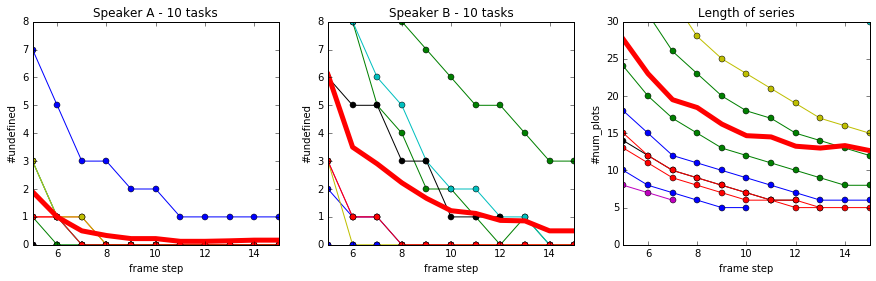

?-() has no defined phonemes. Defaulting to 0
-?() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0


session-03



#Undefs Diff Speaker A (FS 8s to 10s)) = 1.333
#Undefs Diff Speaker B (FS 8s to 10s)) = 0.500
#points diff(FS 8s to 10s) = 3.333


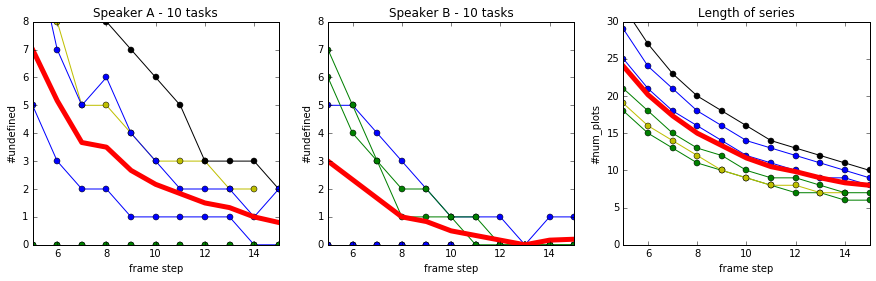

uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0


session-04



#Undefs Diff Speaker A (FS 8s to 10s)) = 1.100
#Undefs Diff Speaker B (FS 8s to 10s)) = 0.800
#points diff(FS 8s to 10s) = 3.300


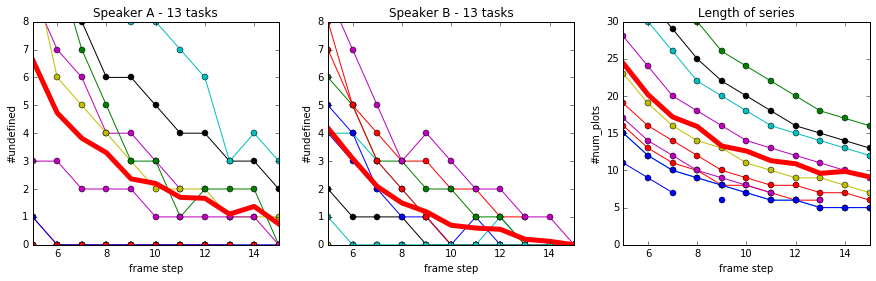

session-05



#Undefs Diff Speaker A (FS 8s to 10s)) = 0.333
#Undefs Diff Speaker B (FS 8s to 10s)) = 0.667
#points diff(FS 8s to 10s) = 2.333


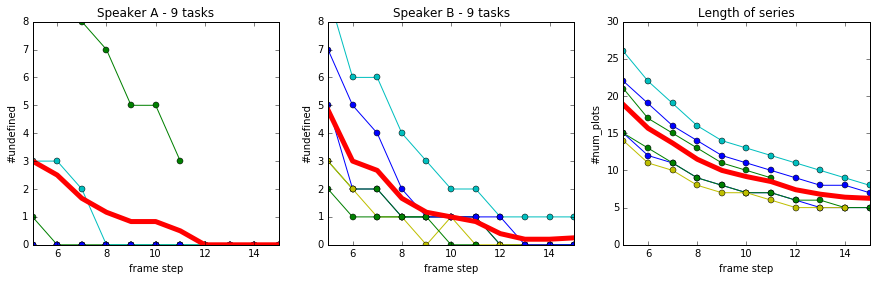

There was an error calling /home/marat/projects/tesis/scripts/voice-analysis.praat with interval [217.659115, 218.125784]
ERROR:main:There was an error calling /home/marat/projects/tesis/scripts/voice-analysis.praat with interval [217.659115, 218.125784]
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0


session-06



#Undefs Diff Speaker A (FS 8s to 10s)) = 1.125
#Undefs Diff Speaker B (FS 8s to 10s)) = 1.167
#points diff(FS 8s to 10s) = 2.750


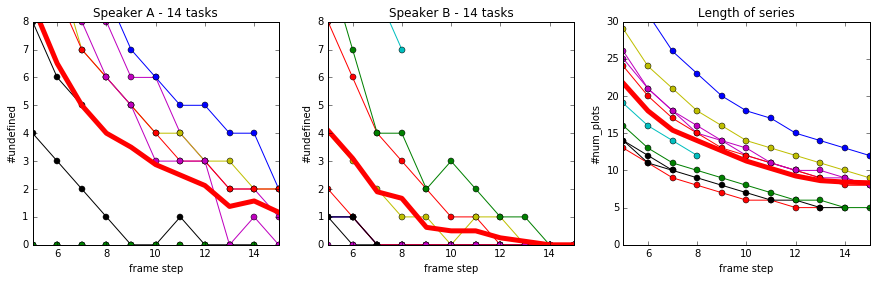

?-() has no defined phonemes. Defaulting to 0


session-07



#Undefs Diff Speaker A (FS 8s to 10s)) = 0.100
#Undefs Diff Speaker B (FS 8s to 10s)) = 0.275
#points diff(FS 8s to 10s) = 1.450


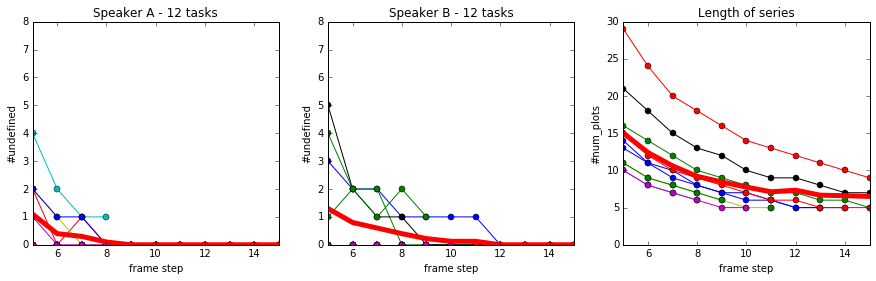

?-() has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0


session-08



#Undefs Diff Speaker A (FS 8s to 10s)) = 0.222
#Undefs Diff Speaker B (FS 8s to 10s)) = 0.111
#points diff(FS 8s to 10s) = 0.667


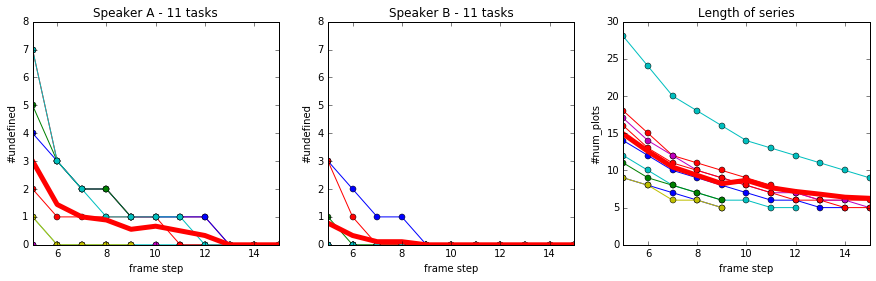

session-09



#Undefs Diff Speaker A (FS 8s to 10s)) = 0.400
#Undefs Diff Speaker B (FS 8s to 10s)) = 0.133
#points diff(FS 8s to 10s) = 0.733


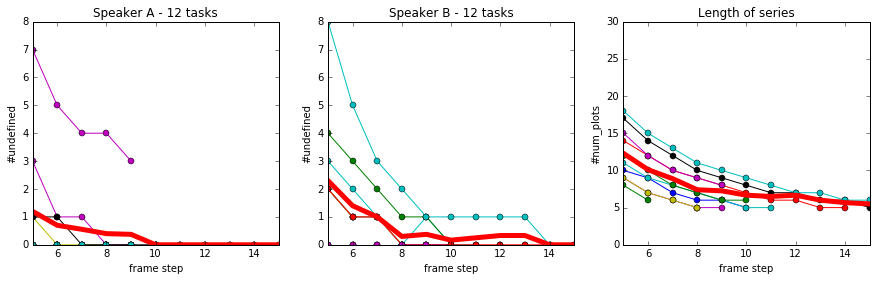

?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0
uu(uu) has no defined phonemes. Defaulting to 0


session-10



#Undefs Diff Speaker A (FS 8s to 10s)) = 0.500
#Undefs Diff Speaker B (FS 8s to 10s)) = 0.357
#points diff(FS 8s to 10s) = 3.786


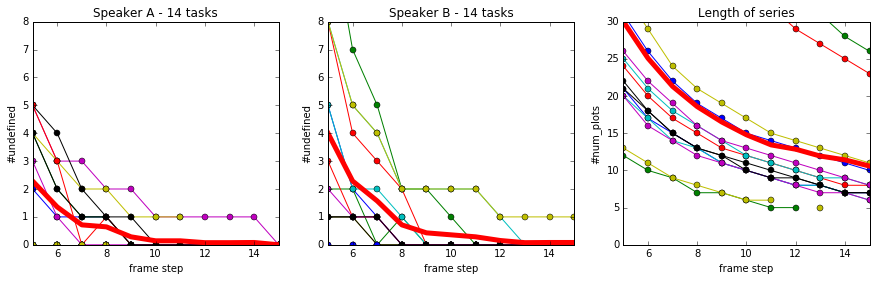

?() has no defined phonemes. Defaulting to 0
?-() has no defined phonemes. Defaulting to 0


session-12



#Undefs Diff Speaker A (FS 8s to 10s)) = 0.250
#Undefs Diff Speaker B (FS 8s to 10s)) = 0.625
#points diff(FS 8s to 10s) = 1.175


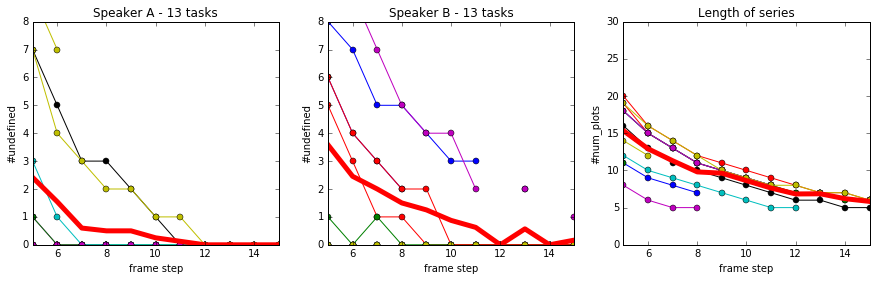

In [3]:
import pylab
from tsa import cross_correlation, cross_correlogram, entrainment
from operator import itemgetter

pylab.rcParams['figure.figsize'] = (15,4)
features = ["F0_MEAN"]
steps = range(5, 16)


def get_session_data_frame(session, feature, task_threshold):
    session_data_A = {}
    session_data_B = {}
    len_data = {}
    for task in session.tasks:
        if task.length < task_threshold:
            continue
        task_frame_A = {}
        task_frame_B = {}
        
        len_data[task.name] = {}
        # Cuento las indefiniciones 
        for frame_step in steps:
            frame_length = 2 * frame_step
            A, _ = tama(task.speechA, feature, frame_step=frame_step, frame_length=frame_length)
            B, _ = tama(task.speechB, feature, frame_step=frame_step, frame_length=frame_length)
            
            if A.count() < config.SERIES_LENGTH_THRESHOLD or B.count() < config.SERIES_LENGTH_THRESHOLD:
                continue
            task_frame_A[frame_step] = A.isnull().sum()
            task_frame_B[frame_step] = B.isnull().sum()
            len_data[task.name][frame_step] = A.size
        
        session_data_A[task.name] = pd.Series(task_frame_A)
        session_data_B[task.name] = pd.Series(task_frame_B)
        
    return pd.DataFrame(session_data_A), pd.DataFrame(session_data_B), pd.DataFrame(len_data)

def plot_window_info(dataframe, mean, title, ax):
    new_title = "%s - %s tasks" % (title, dataframe.shape[1])
    sp = dataframe.plot(title=new_title, style="o-", legend=False, ax=ax)
    mean.plot(style="r-", linewidth=5.0, ax=ax)
    
    print "#Undefs Diff %s (FS 8s to 10s)) = %.3f" % (title, abs(mean[8] - mean[10])) 
    sp.set_ylim([0,8])
    sp.set_xlabel("frame step")
    sp.set_ylabel("#undefined")
    plt.show
    
for feature in features:
    print feature
    
    session_means = {}
    for session in sessions:
        try:
            print "=" * 30
            print session.name
            print "\n" * 2
            dfA, dfB, len_data = get_session_data_frame(session, feature, task_threshold=40)
            meanA = dfA.mean(axis=1)
            meanB = dfB.mean(axis=1)
            
            session_means[session.name + " A"] = meanA
            session_means[session.name + " B"] = meanB
            f, ax = plt.subplots(ncols=3)
            
            plot_window_info(dfA, meanA, "Speaker A", ax[0])
            plot_window_info(dfB, meanB, "Speaker B", ax[1])
            
            sp = len_data.plot(title="Length of series", style="o-", legend=False, ax=ax[2])
            len_mean = len_data.mean(axis=1)
            len_mean.plot(style="r-", linewidth=5.0, ax=ax[2])
            print "#points diff(FS 8s to 10s) = %.3f" % (abs(len_mean[8] - len_mean[10])) 
    
            sp.set_ylim([0, 30])
            sp.set_xlabel("frame step")
            sp.set_ylabel("#num_plots")
            
            plt.show()
        except TypeError:
            print "Skipping %s" % session.name
            pass

                    

    

In [4]:
meandf = pd.DataFrame(session_means)


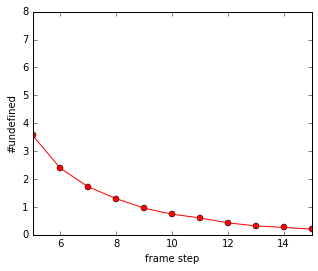

In [5]:
pylab.rcParams['figure.figsize'] = (5,4)
sp = meandf.mean(axis=1).plot(style="ro-")
sp.set_ylim([0,8])
sp.set_xlabel("frame step")
sp.set_ylabel("#undefined")
